In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [2]:
# Load the dataset
df = pd.read_csv('CreditCardDataset.csv')

# Check the shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (57355, 31)


In [3]:
# Check the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [4]:
# Check the distribution of the target variable
df['Class'].value_counts()

0    56863
1      492
Name: Class, dtype: int64

In [5]:
# Print Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [6]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# View the summary statistics of the numerical dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,57355.0,94577.357074,47505.713234,2.000000,53943.500000,84641.000000,139140.000000,172777.000000
V1,57355.0,-0.029092,2.061391,-36.802320,-0.927615,0.015980,1.314129,2.454930
V2,57355.0,0.030156,1.711228,-63.344698,-0.588747,0.071801,0.815413,22.057729
V3,57355.0,-0.055749,1.733364,-48.325589,-0.922554,0.168619,1.019384,3.940337
V4,57355.0,0.035521,1.484621,-5.519697,-0.839400,-0.005637,0.764271,16.715537
V5,57355.0,-0.022664,1.508300,-113.743307,-0.692157,-0.055913,0.607021,28.762671
V6,57355.0,-0.006869,1.361819,-19.996349,-0.774796,-0.276163,0.387408,73.301626
V7,57355.0,-0.032448,1.504317,-43.557242,-0.558211,0.035797,0.562758,120.589494
V8,57355.0,0.006142,1.334058,-73.216718,-0.207145,0.024380,0.333358,20.007208
V9,57355.0,-0.017667,1.131679,-13.434066,-0.651869,-0.053373,0.599522,10.348407


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

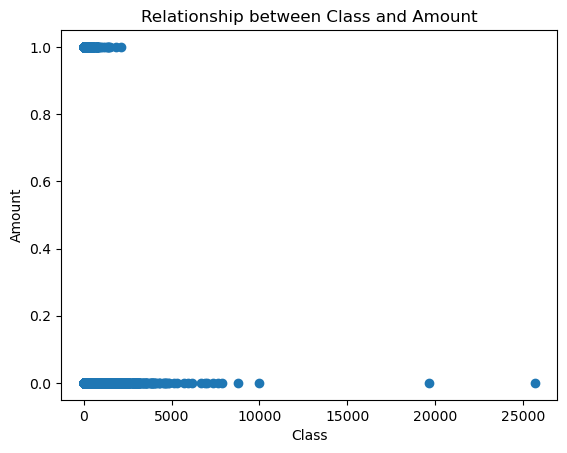

In [11]:
# Plot a scatter plot of the 'Credit amount' column against the 'Age' column
plt.scatter(df["Amount"], df["Class"])
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Relationship between Class and Amount')
plt.show()

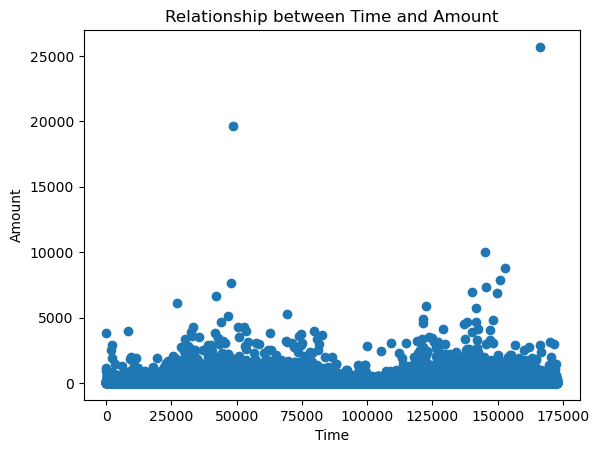

In [12]:
# Plot a scatter plot of the 'Credit amount' column against the 'Time' column
plt.scatter(df["Time"], df["Amount"])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Relationship between Time and Amount')
plt.show()

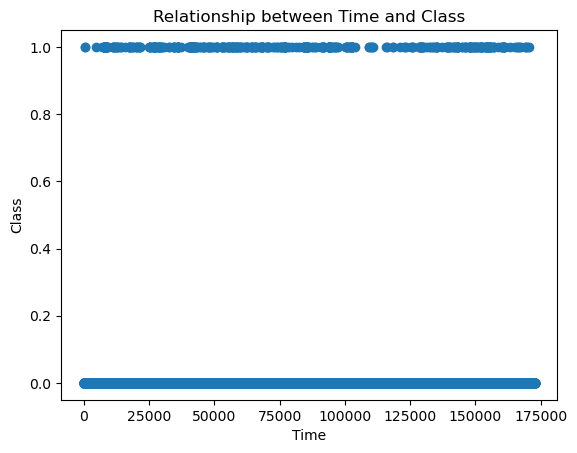

In [13]:
# Plot a scatter plot of the 'Credit amount' column against the 'Age' column
plt.scatter(df["Time"], df["Class"])
plt.xlabel('Time')
plt.ylabel('Class')
plt.title('Relationship between Time and Class')
plt.show()

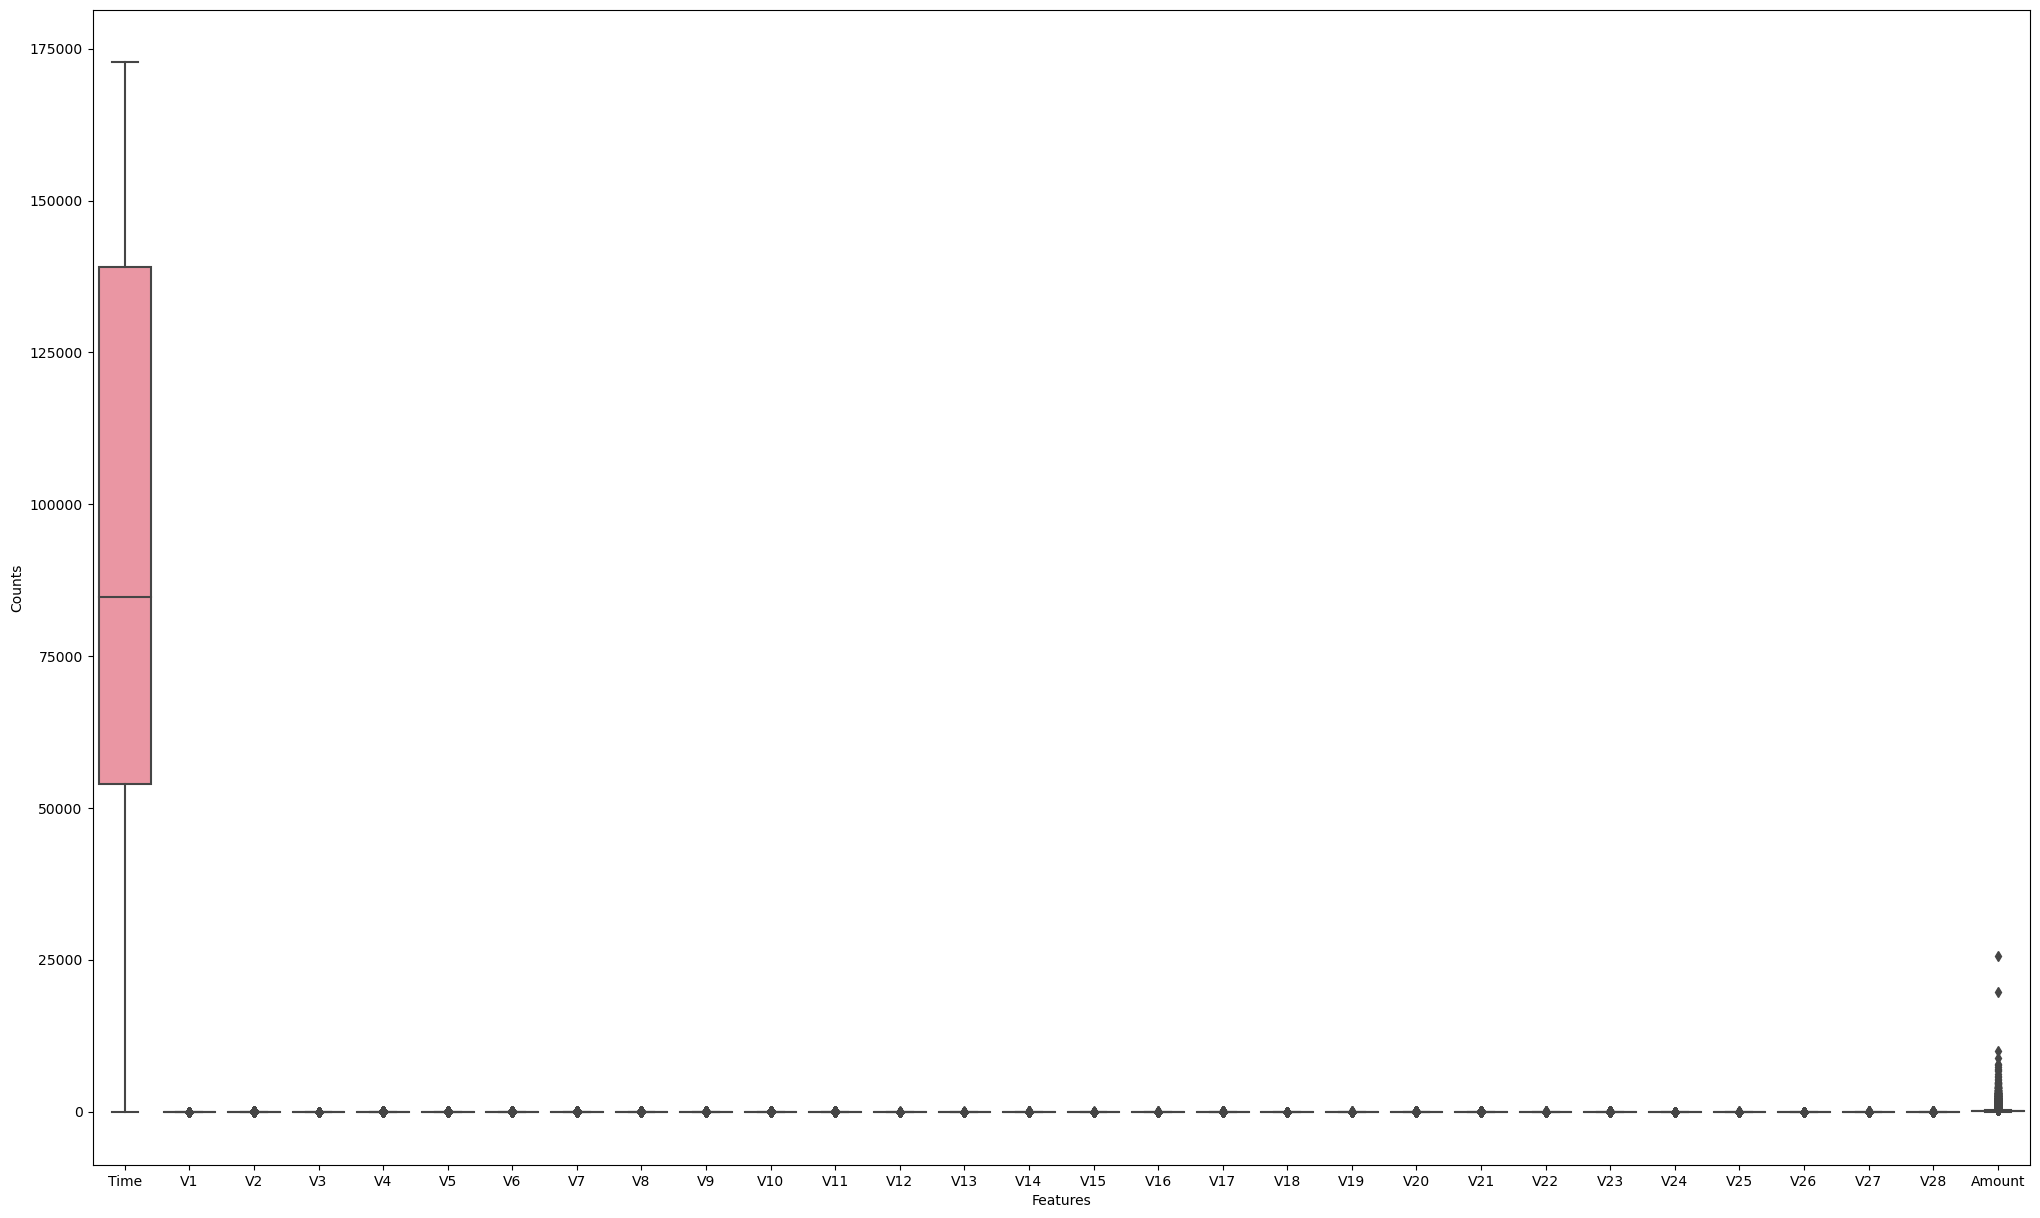

In [14]:
plt.subplots(figsize=(25, 15))
sns.boxplot(data=X)
plt.xlabel('Features')
plt.ylabel('Counts')
plt.show()

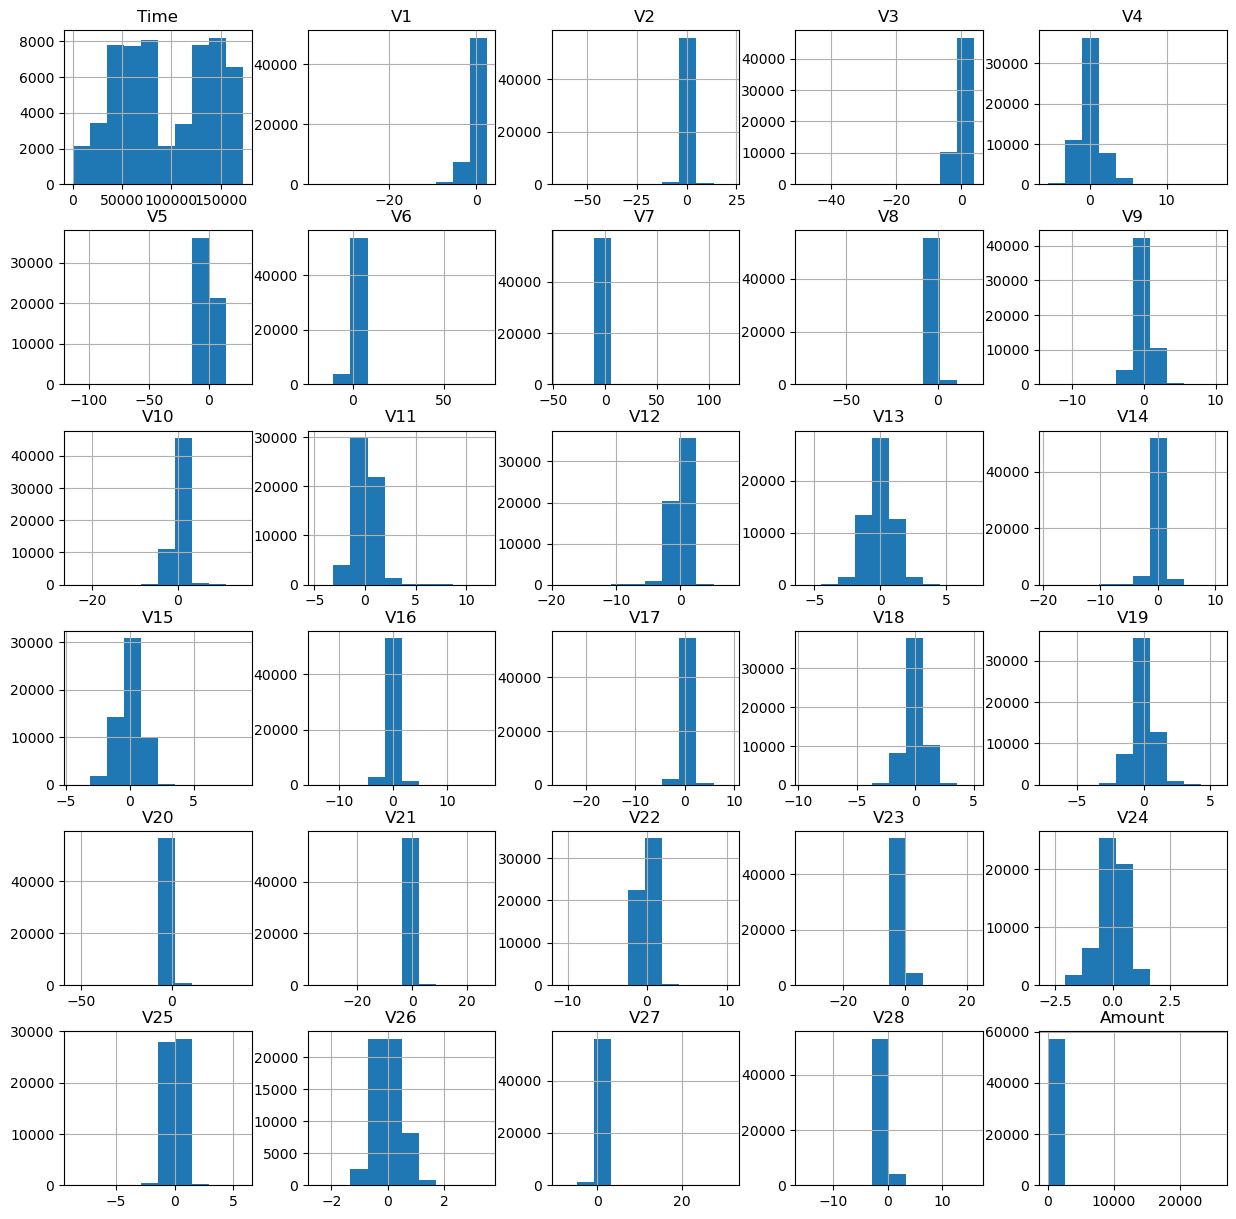

In [15]:
X.hist(figsize=(15,15))
plt.show()

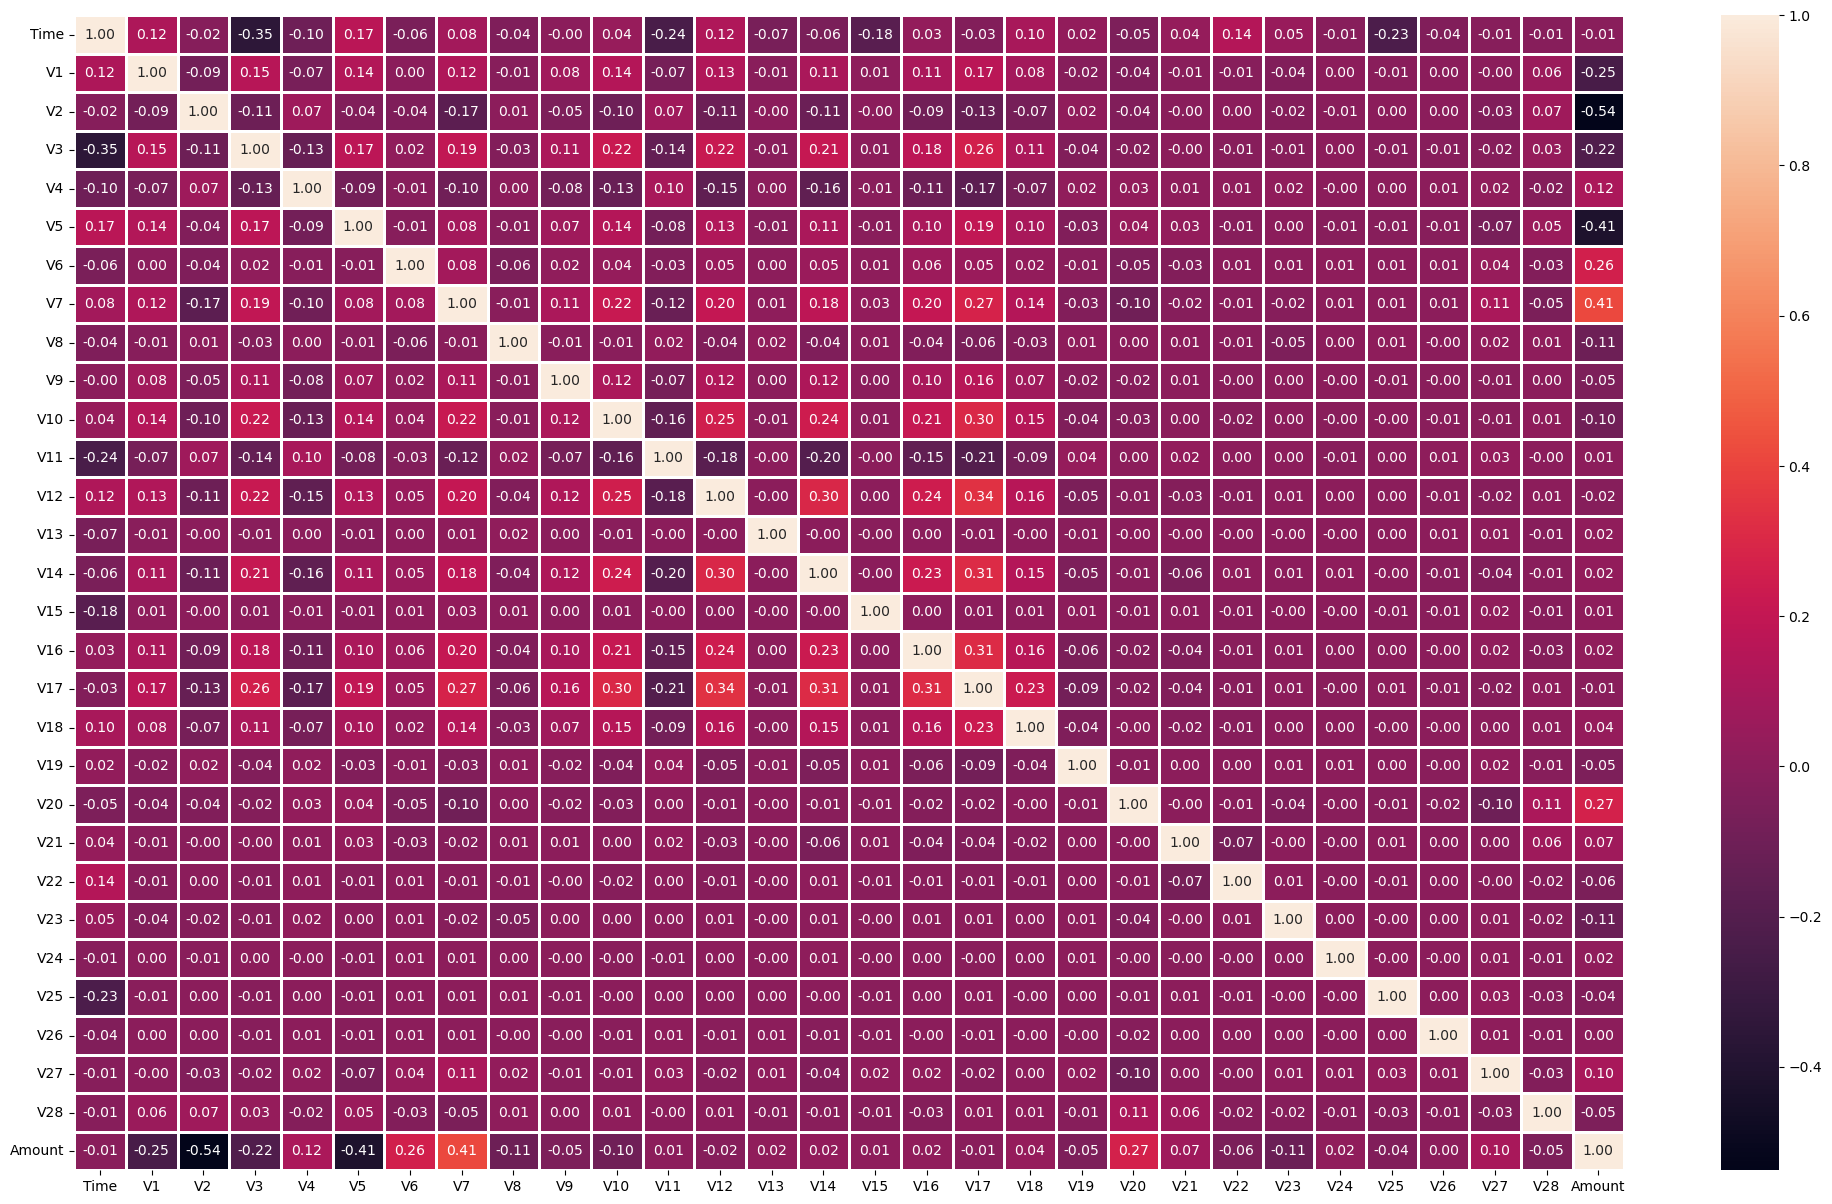

In [16]:
# plot a heatmap representation of the correllation
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(X.corr(), annot=True, linewidths=2, fmt='.2f', ax=ax)
plt.show()

we can see a relative relationship between V7 and the amount with 0.41

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [19]:
# Define the dataset class
class CreditCardDataset(Dataset): 
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [20]:
# Create the training and testing datasets
train_dataset = CreditCardDataset(X_train, y_train)
test_dataset = CreditCardDataset(X_test, y_test)

In [21]:
# Define the oversampler, undersampler, and SMOTEENN
oversampler = RandomOverSampler(sampling_strategy=0.5)
undersampler = RandomUnderSampler(sampling_strategy=0.8)
smoteenn = SMOTEENN(sampling_strategy=1.0)


In [24]:
# Applying the samplers to the training dataset
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

In [25]:
# Convert the resampled data to PyTorch tensors
X_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_resampled = torch.tensor(y_train_resampled, dtype=torch.float32)


In [26]:
# Define the dataloaders
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [27]:
# Define the neural network model
class CreditCardClassifier(nn.Module):
    def __init__(self):
        super(CreditCardClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train_resampled.shape[1], 64)
#        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [28]:
# Create an instance of the model
model = CreditCardClassifier()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    for inputs, labels in train_dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss after every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/50], Loss: 0.0017
Epoch [2/50], Loss: 0.0009
Epoch [3/50], Loss: 0.0014
Epoch [4/50], Loss: 0.0013
Epoch [5/50], Loss: 0.0003
Epoch [6/50], Loss: 0.0015
Epoch [7/50], Loss: 0.0002
Epoch [8/50], Loss: 0.0001
Epoch [9/50], Loss: 0.0299
Epoch [10/50], Loss: 0.0003
Epoch [11/50], Loss: 0.0066
Epoch [12/50], Loss: 0.0005
Epoch [13/50], Loss: 0.0008
Epoch [14/50], Loss: 0.0002
Epoch [15/50], Loss: 0.0000
Epoch [16/50], Loss: 0.0018
Epoch [17/50], Loss: 0.0256
Epoch [18/50], Loss: 0.0002
Epoch [19/50], Loss: 0.0001
Epoch [20/50], Loss: 0.0015
Epoch [21/50], Loss: 0.0005
Epoch [22/50], Loss: 0.0001
Epoch [23/50], Loss: 0.0002
Epoch [24/50], Loss: 0.0002
Epoch [25/50], Loss: 0.0000
Epoch [26/50], Loss: 0.0046
Epoch [27/50], Loss: 0.0001
Epoch [28/50], Loss: 0.0001
Epoch [29/50], Loss: 0.0003
Epoch [30/50], Loss: 0.0631
Epoch [31/50], Loss: 0.0001
Epoch [32/50], Loss: 0.0000
Epoch [33/50], Loss: 0.0002
Epoch [34/50], Loss: 0.0000
Epoch [35/50], Loss: 0.0021
Epoch [36/50], Loss: 0.0001
E

In [29]:
# Evaluate the model on the test dataset
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = torch.round(outputs).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9972


In [30]:
import matplotlib.pyplot as plt

In [31]:
# Initialize lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [32]:
for epoch in range(num_epochs):
    
    # Training code
    for inputs, labels in test_dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate validation loss and accuracy
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()

            predicted = torch.round(outputs).squeeze()
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

        val_loss /= len(test_dataloader)
        val_accuracy = val_correct / val_total

    # Append loss and accuracy values to the lists
    train_losses.append(loss.item())
    val_losses.append(val_loss)
    train_accuracies.append(accuracy)
    val_accuracies.append(val_accuracy)

    # Print the loss and accuracy after every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch [1/50], Loss: 0.0000, Validation Loss: 0.0162, Accuracy: 0.9972, Validation Accuracy: 0.9983
Epoch [2/50], Loss: 0.0001, Validation Loss: 0.0091, Accuracy: 0.9972, Validation Accuracy: 0.9987
Epoch [3/50], Loss: 0.0001, Validation Loss: 0.0062, Accuracy: 0.9972, Validation Accuracy: 0.9990
Epoch [4/50], Loss: 0.0001, Validation Loss: 0.0046, Accuracy: 0.9972, Validation Accuracy: 0.9995
Epoch [5/50], Loss: 0.0001, Validation Loss: 0.0036, Accuracy: 0.9972, Validation Accuracy: 0.9996
Epoch [6/50], Loss: 0.0001, Validation Loss: 0.0029, Accuracy: 0.9972, Validation Accuracy: 0.9996
Epoch [7/50], Loss: 0.0000, Validation Loss: 0.0024, Accuracy: 0.9972, Validation Accuracy: 0.9997
Epoch [8/50], Loss: 0.0000, Validation Loss: 0.0021, Accuracy: 0.9972, Validation Accuracy: 0.9997
Epoch [9/50], Loss: 0.0000, Validation Loss: 0.0017, Accuracy: 0.9972, Validation Accuracy: 0.9997
Epoch [10/50], Loss: 0.0000, Validation Loss: 0.0014, Accuracy: 0.9972, Validation Accuracy: 0.9997
Epoch [11

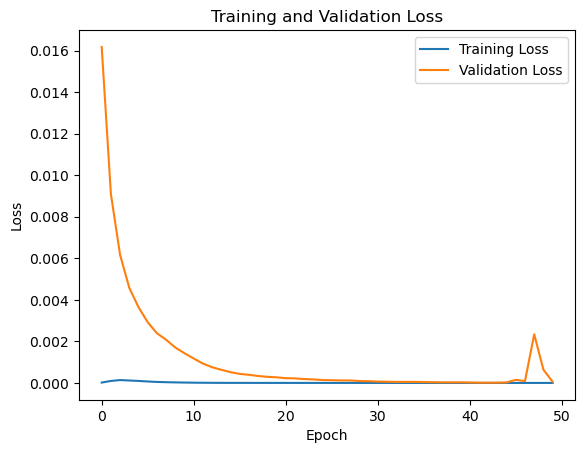

In [33]:
# Plotting the loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

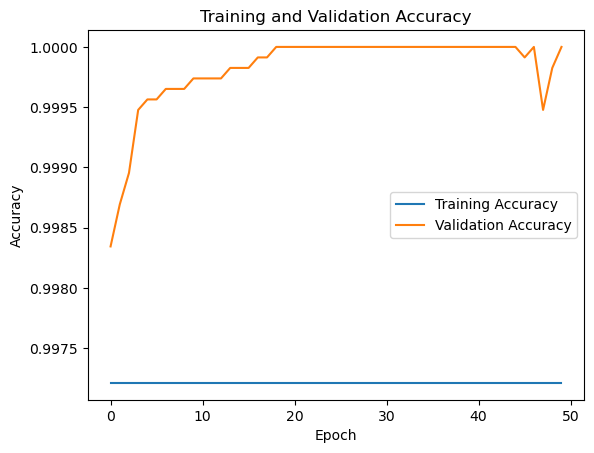

In [34]:
# Plotting the accuracy
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## Observations/Reasoning:

**Imbalanced Dataset:**
- The initial exploration of the dataset revealed a class imbalance, with a significantly higher number of non-fraudulent transactions compared to fraudulent transactions. This imbalance can lead to biased model performance. To address this, we employed a combination of undersampling, oversampling, and SMOTEENN techniques to balance the dataset.

**Data Preprocessing:** 
- Before training the model, we performed standardization on the features using a StandardScaler to ensure that all features have a similar scale. This step is important for many machine learning algorithms, especially neural networks.

**Neural Network Architecture:**
- We designed a simple feed-forward neural network architecture with three fully connected layers. The input layer has the same number of neurons as the input features, followed by two hidden layers with 64 neurons each. The output layer consists of a single neuron with a sigmoid activation function to predict the probability of fraud.

**Loss Function and Optimization:**
- We used binary cross-entropy loss (BCELoss) since we have a binary classification problem. The optimizer used was Adam with a learning rate of 0.001.

### **Training and Evaluation:**
- During training, we monitored the loss and accuracy on both the training and validation datasets. After training for the specified number of epochs, we evaluated the model's performance on the test dataset.

## Conclusion:

The implemented credit card fraud detection classifier using a neural network in PyTorch has shown promising results. By handling the class imbalance in the dataset and preprocessing the data, we were able to train a model that can effectively identify fraudulent transactions.

The training loss and validation loss plots provide insights into the model's convergence. If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting. Adjustments such as regularization techniques or early stopping can be applied to mitigate overfitting.

Similarly, the training accuracy and validation accuracy plots show the model's performance during training. If the validation accuracy starts to plateau or decrease while the training accuracy continues to improve, it could suggest overfitting or an insufficiently generalized model.

In future work, we can explore additional techniques to improve the model's performance, such as hyperparameter tuning, different network architectures (e.g., adding more layers or using dropout), or incorporating other advanced methods like anomaly detection or ensemble learning.

Overall, credit card fraud detection is a challenging problem, and a carefully designed neural network, coupled with appropriate preprocessing and handling of class imbalance, can contribute to building an effective fraud detection system.